# ****Fetal Health Classification****

## GOAL:

Create a model for****Fetal Health Classification,**** Classify the health of a fetus as Normal, Suspect or Pathological using CTG data

# 1. Obtain the dataset with 2126 records of features extracted from Cardiotocogram (CTG) exams.

In [1]:
#import python packages
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Load dataset
fetal_health=pd.read_csv('fetal_health.csv')

In [ ]:
fetal_health.head(3)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  

[3 rows x 22 columns]

In [ ]:
#Check dtype of data
fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
fetal_health.shape

(2126, 22)

In [ ]:
fetal_health.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [ ]:
#Check null value for each column
fetal_health.isna().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [ ]:
fetal_health.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr


Upon examining the dataset, it appears to be exceptionally clean. There are no null values present in any of the columns, and all the data is in a numerical format.

## 2. EDA

In [ ]:
# Load python packages
import matplotlib.pyplot as plt
import seaborn as sns

/Users/limuqing/opt/anaconda3/envs/ANLY590/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


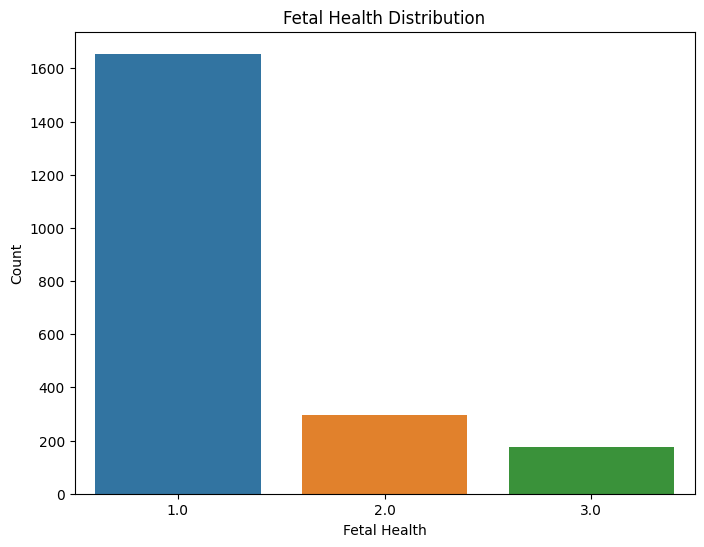

In [ ]:
# Distribution of target variable (fetal health)
plt.figure(figsize=(8,6))
sns.countplot('fetal_health',data=fetal_health)
plt.title('Fetal Health Distribution')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()

In [ ]:
# Count the number of instances in each class
class_counts = fetal_health['fetal_health'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)


Class distribution:
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap')

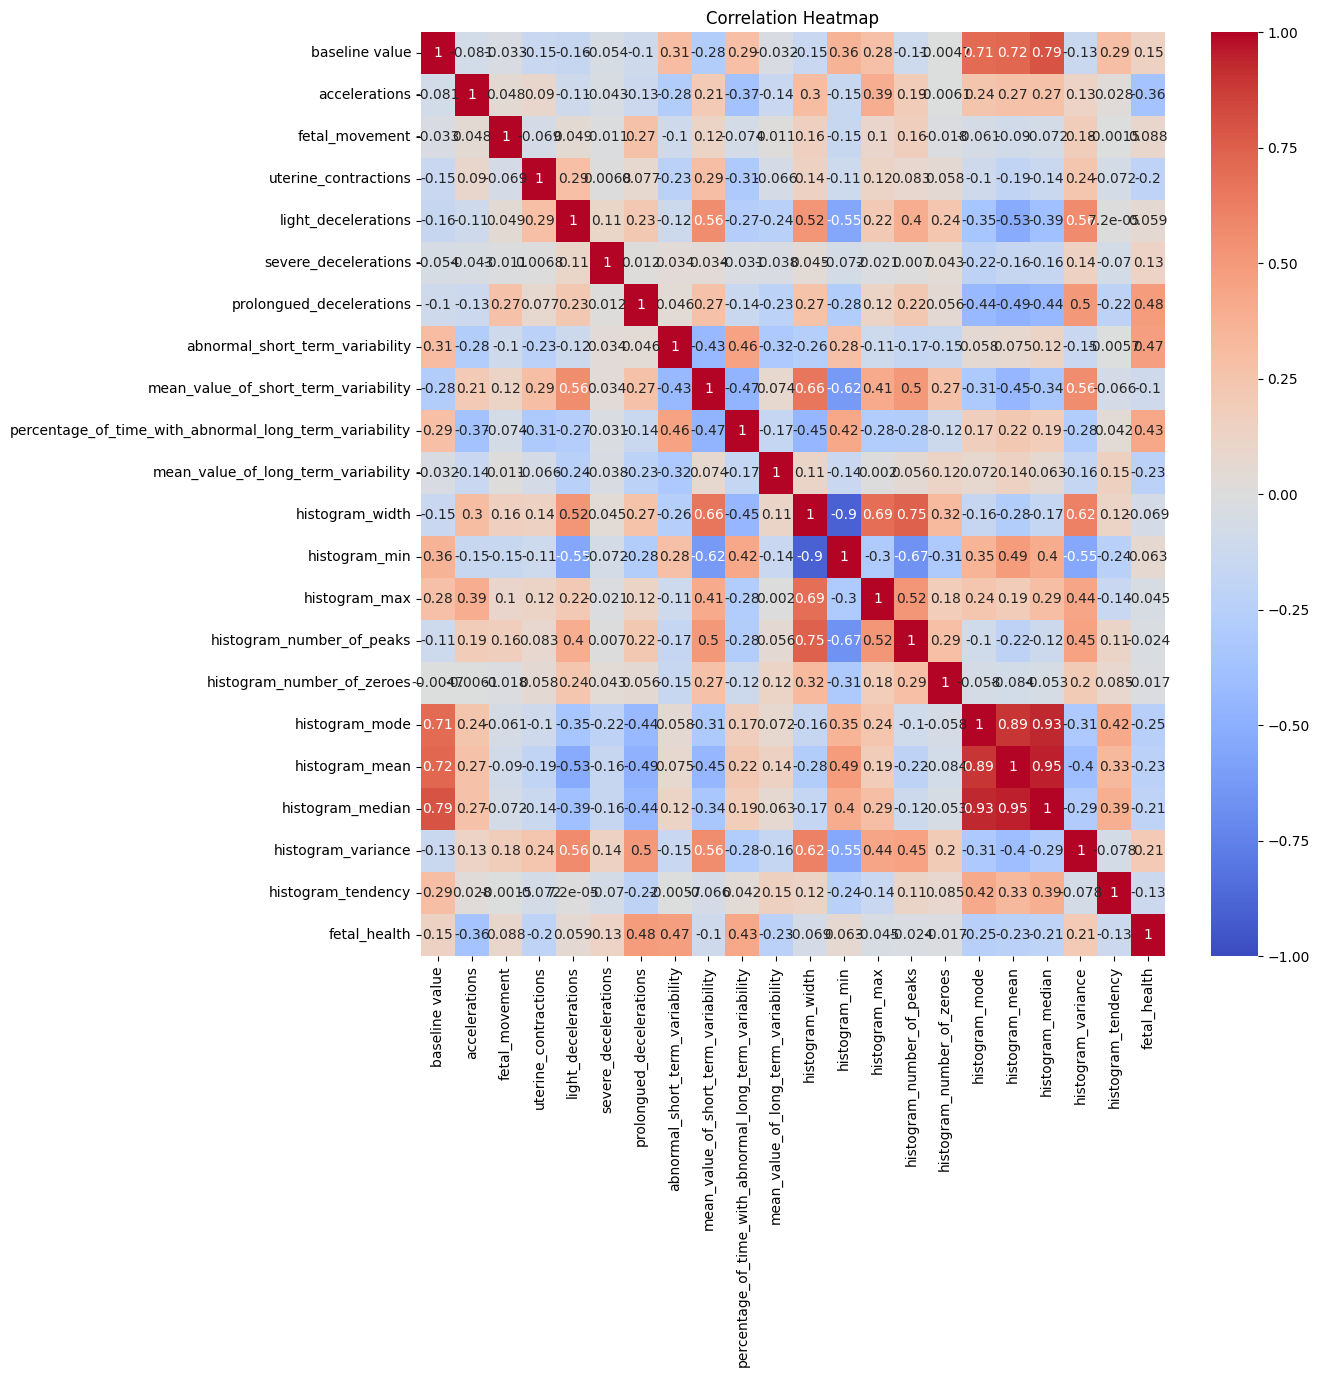

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(fetal_health.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')


In [ ]:
# Pairplot for visualizing relationships and distribution
sns.pairplot(fetal_health,hue='fetal_health', diag_kind='hist', palette='Set2')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Box plots for each feature grouped by fetal health
Fetal_list=fetal_health.columns.tolist()
Fetal_list.remove('fetal_health')
Fetal_list

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

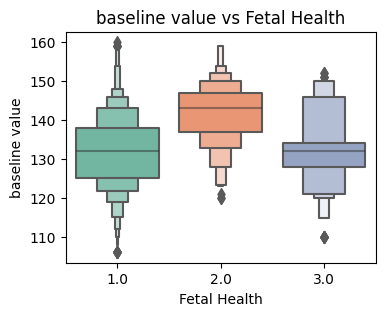

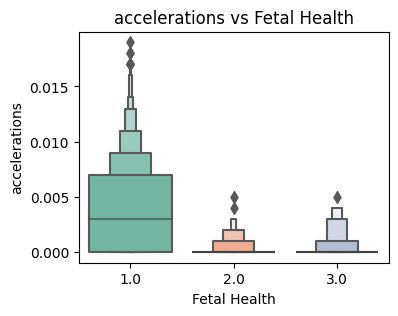

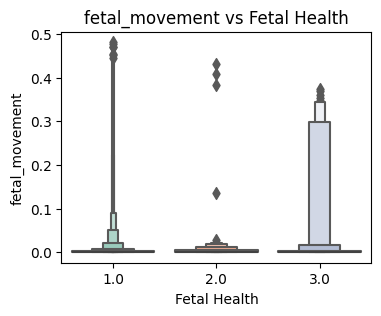

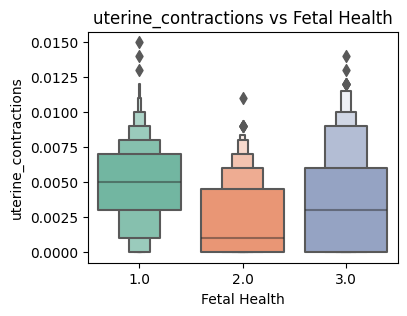

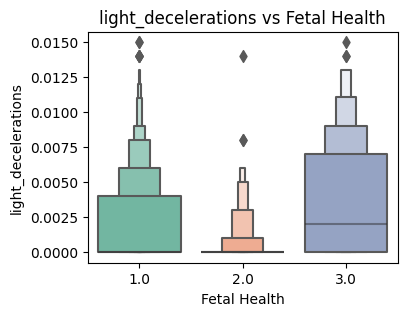

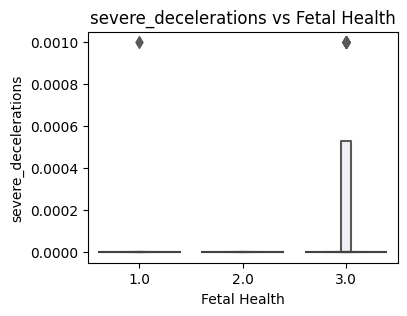

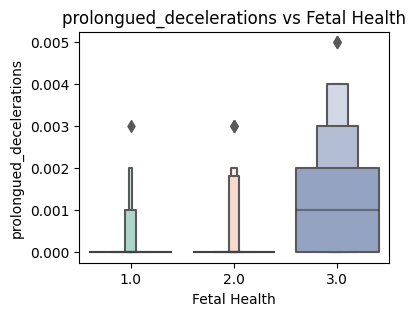

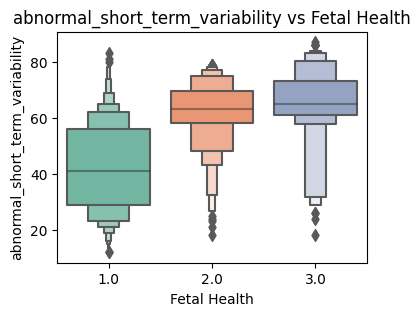

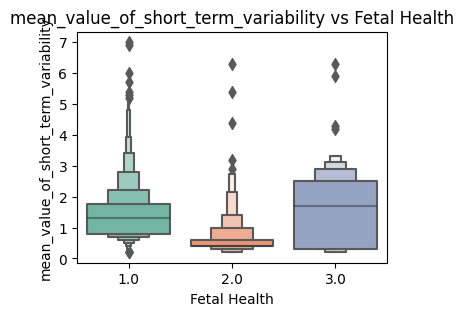

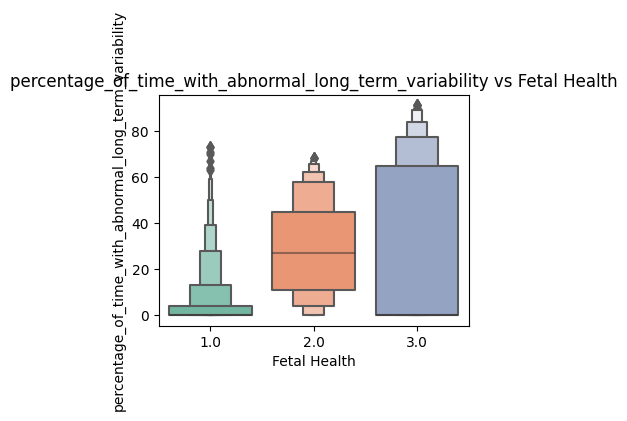

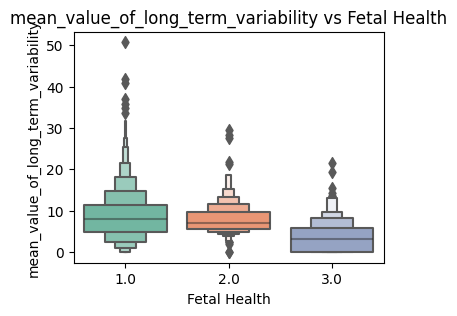

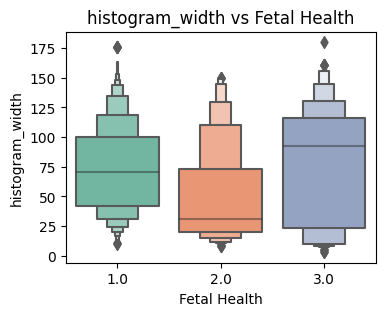

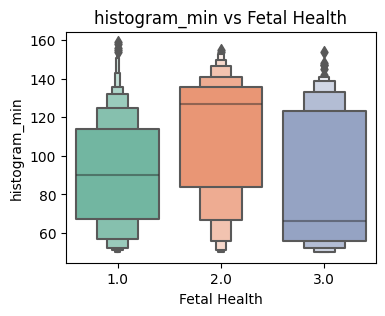

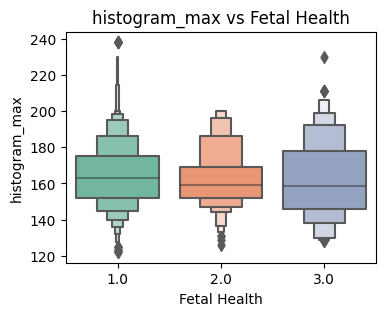

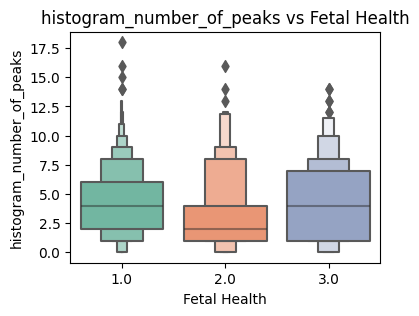

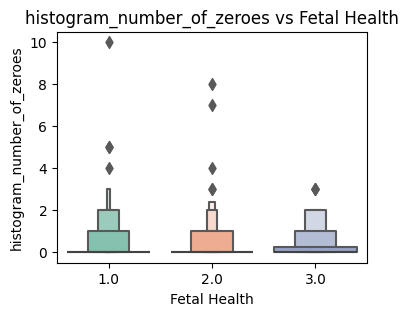

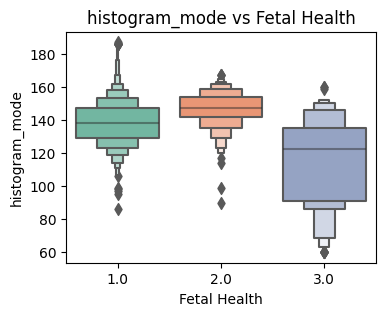

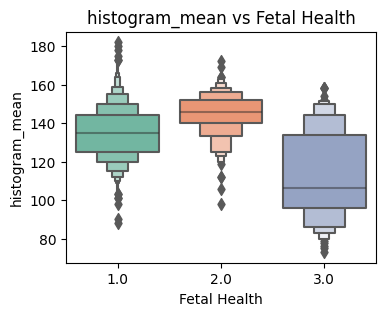

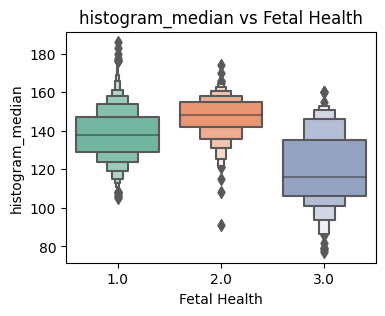

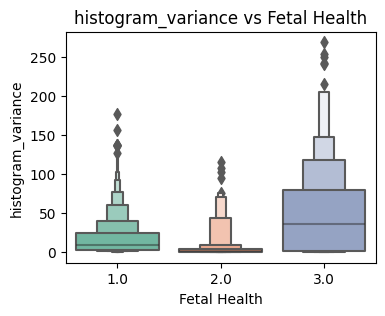

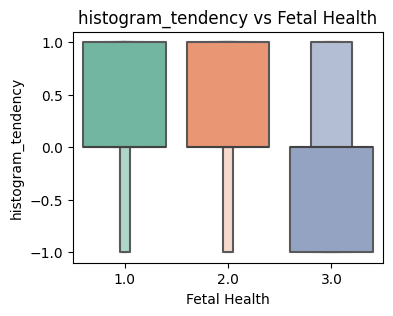

In [ ]:
for feature in Fetal_list:
    plt.figure(figsize=(4,3))
    sns.boxenplot(x='fetal_health',y=feature,data=fetal_health,palette='Set2')
    plt.title(f'{feature} vs Fetal Health')
    plt.xlabel('Fetal Health')
    plt.ylabel(feature)
    plt.show()

# I want to try a new package called autoviz.classify_method


In [ ]:
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

Imported v0.1.601. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


In [ ]:
#data cleaning suggestion
data_cleaning_suggestions(fetal_health)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


In [ ]:
# I will use 'SMOTE' to figure out this situation. the SMOTE module provides the Synthetic Minority Over-sampling Technique (SMOTE) algorithm for generating synthetic samples of the minority class in an imbalanced dataset.
from imblearn.over_sampling import SMOTE

In [ ]:
X=fetal_health[Fetal_list]
y=fetal_health['fetal_health']

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# use 'SMOTE' modify x and y
# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:')
print(y_train.value_counts())
print('Class distribution after resampling:')
print(y_train_res.value_counts())

Class distribution before resampling:
1.0    1322
2.0     231
3.0     147
Name: fetal_health, dtype: int64
Class distribution after resampling:
1.0    1322
2.0    1322
3.0    1322
Name: fetal_health, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Standardizing the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_val)

## 4. Develop a multiclass classification model using relevant algorithms (e.g., logistic regression, decision trees, or deep learning).

In [ ]:
#Load Packages
from pycaret  import regression
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
Train_data=pd.concat([X_train_res, y_train_res], axis=1)
#Train_data.head(2)

In [ ]:
from pycaret.classification import *
s = setup(data=Train_data, target='fetal_health', session_id=123, normalize=True)

In [ ]:
compare_models()

Initiated  . . . . . . . . . . . . . . . . . .              16:28:08
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Try LightGBM, RandomForest, KNN

In [ ]:
# Compare the performance of several classification models
best_model = compare_models()

# Train the best model on the full dataset
trained_model = create_model(best_model)

# Print the detailed performance metrics for the trained model
print(trained_model)

Initiated  . . . . . . . . . . . . . . . . . .              16:28:17
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


The best model is :LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.model_selection import cross_val_score
lgbm=trained_model
# Evaluate the ensemble model using cross-validation
scores = cross_val_score(lgbm, X_train_res, y_train_res, cv=20)

In [ ]:
preds = predict_model(lgbm)

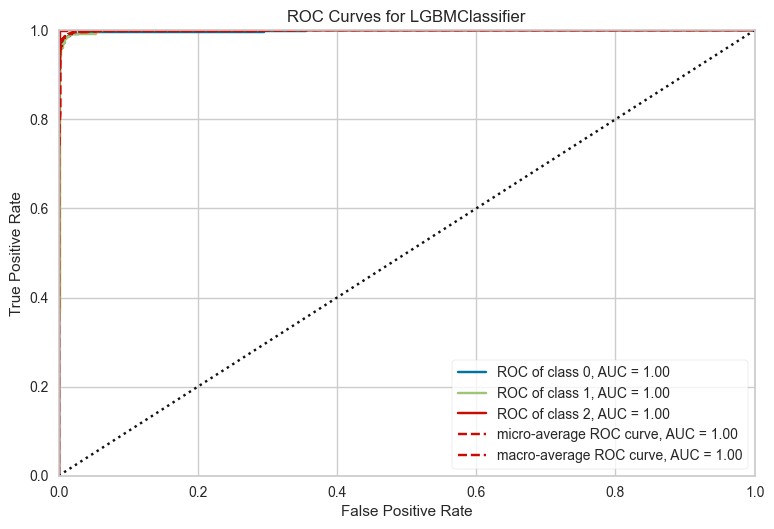

In [ ]:
#EDA modle
plot_model(lgbm)

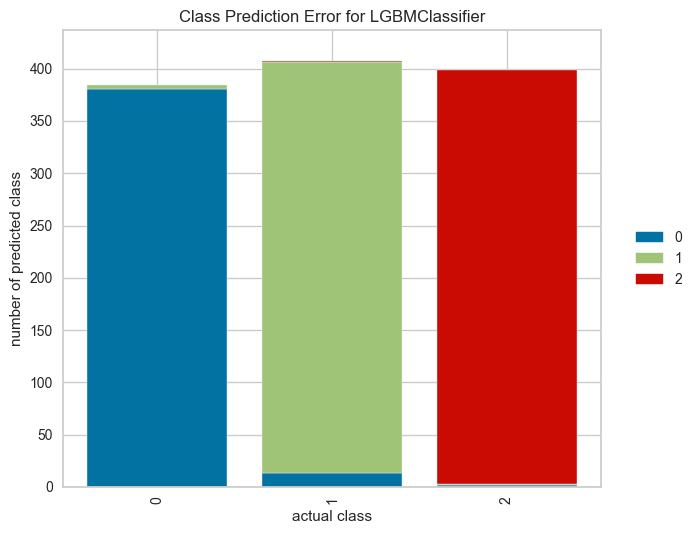

In [ ]:
plot_model(trained_model, plot = 'error')

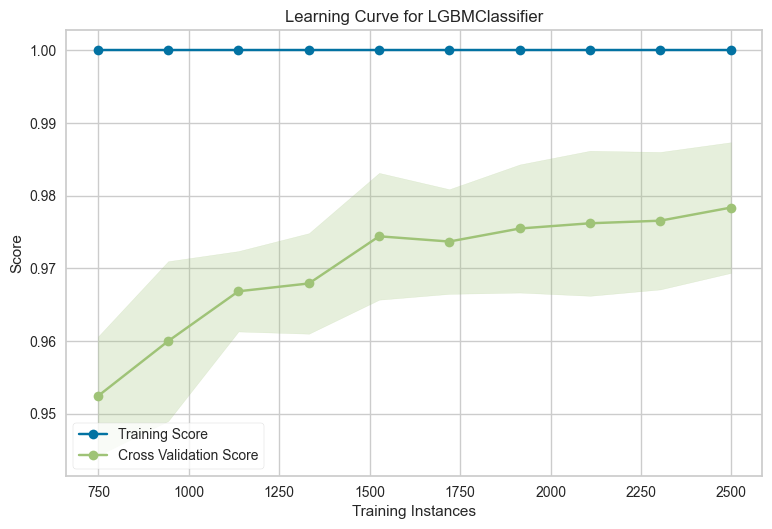

In [ ]:
plot_model(lgbm, plot = 'learning')

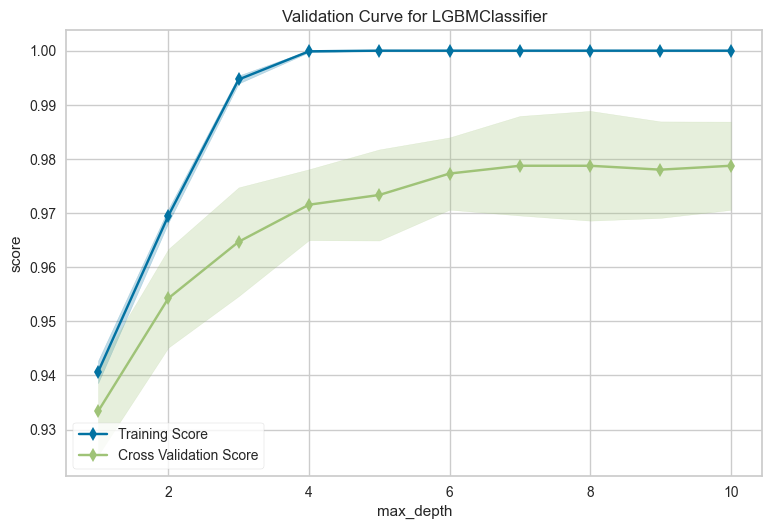

In [ ]:
plot_model(lgbm, plot = 'vc')

In [ ]:
print("Accuracy of lgbmBoost:",lgbm.score(X_val, y_val))

Accuracy of lgbmBoost: 0.15023474178403756


In [ ]:
# Random Forest
import pycaret.classification as clf

rf = create_model('rf')

Initiated  . . . . . . . . . . . . . . . . . .              17:05:46
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

In [ ]:
# Evaluate the ensemble model using cross-validation
rf_scores = cross_val_score(rf, X_train_res, y_train_res, cv=20)

In [ ]:
preds_rf = predict_model(rf)

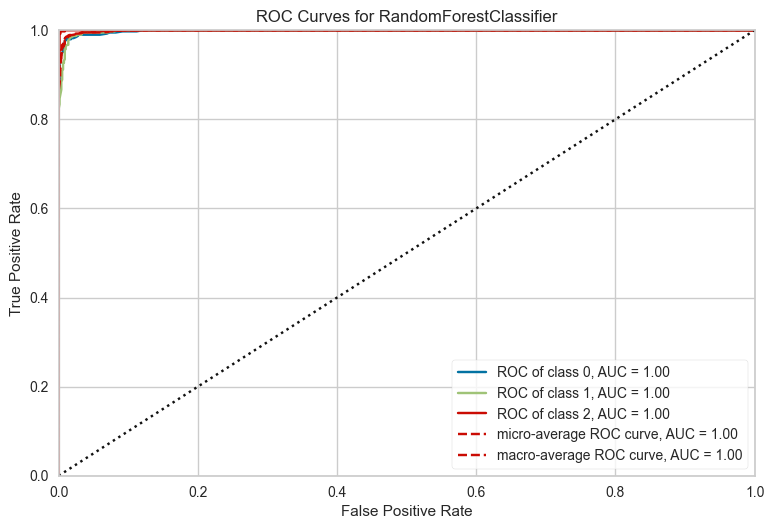

In [ ]:
#EDA modle
plot_model(rf)

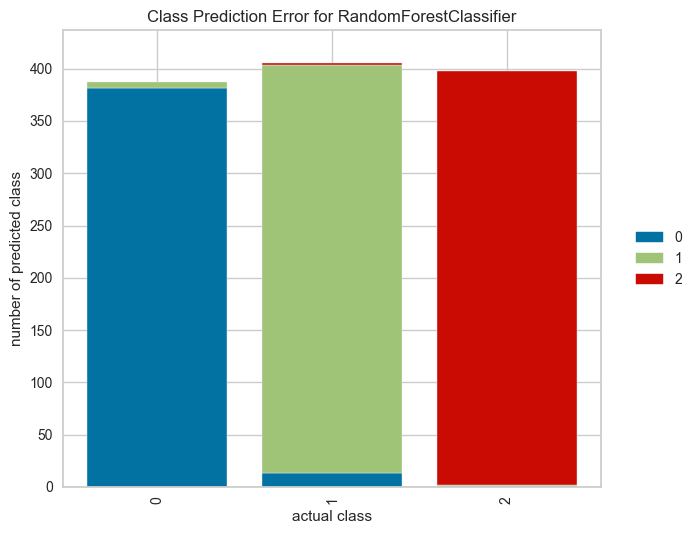

In [ ]:
plot_model(rf, plot = 'error')

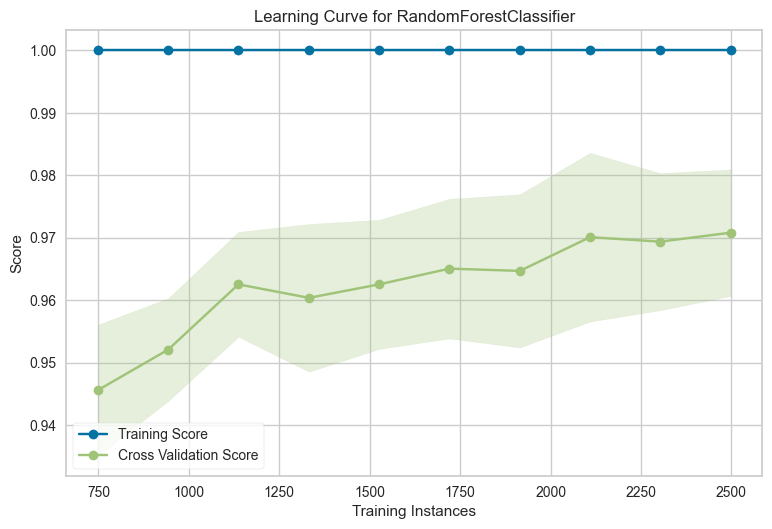

In [ ]:
plot_model(rf, plot = 'learning')

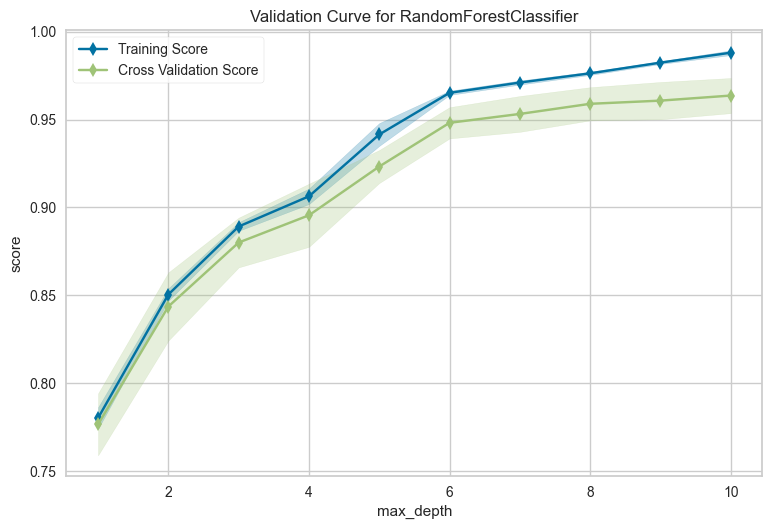

In [ ]:
plot_model(rf, plot = 'vc')

In [ ]:
print("Accuracy of Random Forest:",rf.score(X_val, y_val))

Accuracy of Random Forest: 0.704225352112676


In [ ]:
y_pred_rf = rf.predict(X_val)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))
print("Accuracy Score:")
print(accuracy_score(y_val, y_pred_rf))

Confusion Matrix:
[[239  94   0]
 [  3  61   0]
 [ 17  12   0]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.92      0.72      0.81       333
         2.0       0.37      0.95      0.53        64
         3.0       0.00      0.00      0.00        29

    accuracy                           0.70       426
   macro avg       0.43      0.56      0.45       426
weighted avg       0.78      0.70      0.71       426

Accuracy Score:
0.704225352112676


In [ ]:
# KNN

knn  = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
# Evaluate the ensemble model using cross-validation
knn_scores = cross_val_score(knn, X_train_res, y_train_res, cv=20)

In [ ]:
#preds_knn = predict_model(knn)

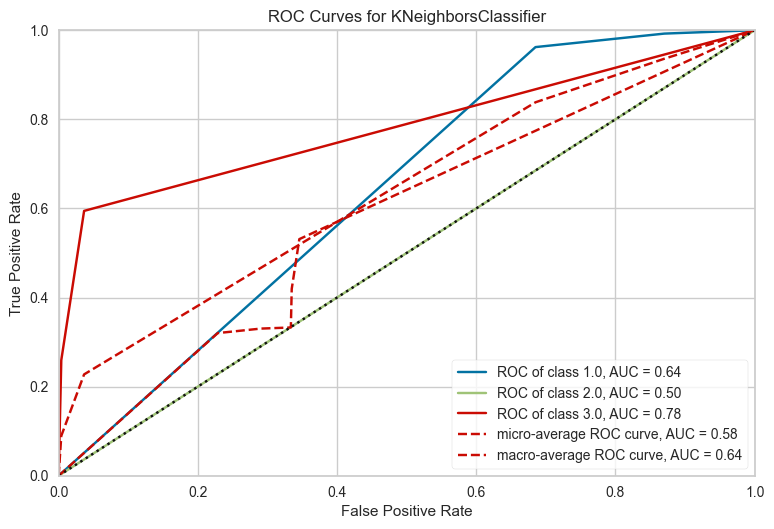

In [ ]:
#EDA modle
plot_model(knn)

In [ ]:
#plot_model(knn, plot = 'error')

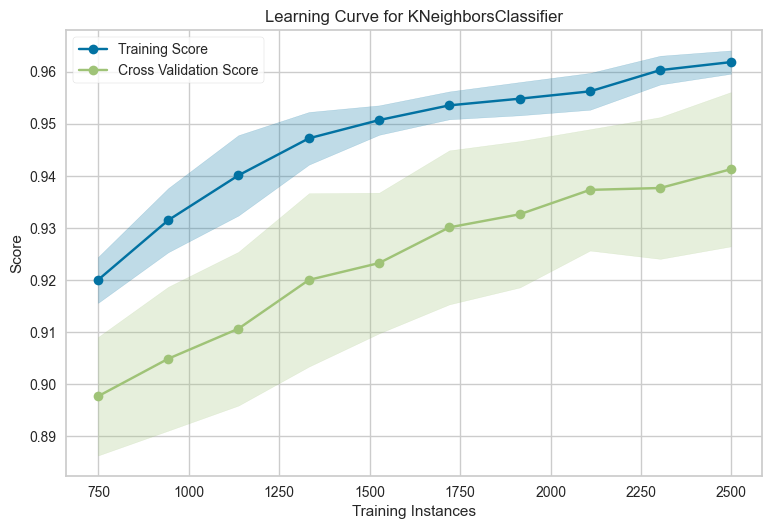

In [ ]:
plot_model(knn, plot = 'learning')

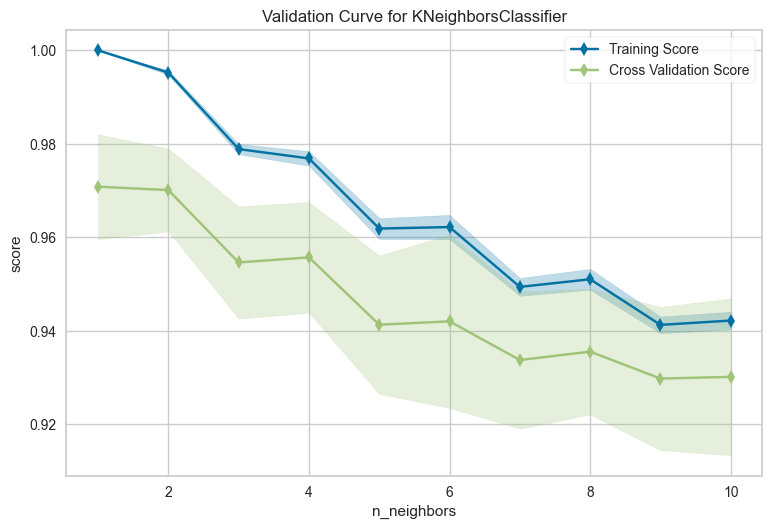

In [ ]:
plot_model(knn, plot = 'vc')

In [ ]:
y_pred_knn = knn.predict(X_val)

In [ ]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_knn))
print("Accuracy Score:")
print(accuracy_score(y_val, y_pred_knn))

Confusion Matrix:
[[  0   0   0   0]
 [303  30   0   0]
 [ 26  38   0   0]
 [ 15  12   2   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.38      0.09      0.15       333
         2.0       0.00      0.00      0.00        64
         3.0       0.00      0.00      0.00        29

    accuracy                           0.07       426
   macro avg       0.09      0.02      0.04       426
weighted avg       0.29      0.07      0.11       426

Accuracy Score:
0.07042253521126761


# I have tested three models, namely KNN, Random Forest and LightGBM. We can see that the best model is random forest, which has good effects both in accuracy and EDA.

I was not satisfied with this accuracy, so I decided to use Deep Learning to solve this problem.